In [22]:
import torch
import torchvision
import numpy as np
from torch import nn
from torch import optim
from torch.autograd import Variable

In [41]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
def print_tens_info(tensor):
    print("X :\n%s\n" % tensor)
    print("X количество измерений:\n%s\n" % tensor.dim())
    print("X размеры : ",  tensor.size())
    print(f"{tensor.type()}")
#     print("Добавим 10 :\n%s\n" % (tensor + 10))
#     print("Среднее по строчке :\n%s\n" % (tensor.mean(axis=-1)))
#     print("Среднее по столбцу :\n%s\n" % (tensor.mean(axis=0)))

In [34]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [108]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [109]:
train_dataset = torchvision.datasets.CIFAR10(
    root='./data/',
    train=True,
    transform=transform,
    download=True
)

Files already downloaded and verified


In [110]:
image, label = train_dataset[4]

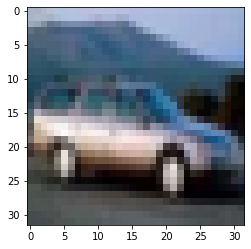

In [112]:
plt.imshow(image.permute(1,2,0).numpy() /2 + 0.5)

In [113]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

In [114]:
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False,
    download=True, transform=transform
)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


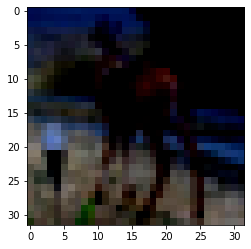

In [120]:
image = test_dataset[100][0]
plt.imshow(image.permute(1,2,0).numpy() )

In [121]:
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=4,
    shuffle=False
)

In [122]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [142]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cpu')

In [143]:
criterion = nn.CrossEntropyLoss()
optimizer =optim.Adam(net.parameters(), lr=0.001,)
                     #momentum=0.9)

In [144]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 300 == 0:
            print(f'[{epoch+1}, {i+1}] loss: {running_loss / 2000}')
            running_loss = 0.0
print('Training finished')

[1, 1] loss: 0.0011557856798171998
[1, 301] loss: 0.27618885761499407
[1, 601] loss: 0.23290895414352417
[2, 1] loss: 0.0007293441891670227
[2, 301] loss: 0.20979913073778153
[2, 601] loss: 0.20144554123282432
[3, 1] loss: 0.0006841629147529602
[3, 301] loss: 0.1897562129497528
[3, 601] loss: 0.1860946738421917
[4, 1] loss: 0.0005311236381530762
[4, 301] loss: 0.17697470861673356
[4, 601] loss: 0.17380014219880105
[5, 1] loss: 0.000629942774772644
[5, 301] loss: 0.16467690581083297
[5, 601] loss: 0.16576314389705657
[6, 1] loss: 0.00047666820883750916
[6, 301] loss: 0.15608459281921386
[6, 601] loss: 0.159733500957489
[7, 1] loss: 0.0005953269004821777
[7, 301] loss: 0.14893776842951775
[7, 601] loss: 0.15188504591584207
[8, 1] loss: 0.0004567898511886597
[8, 301] loss: 0.142361530572176
[8, 601] loss: 0.1454636946320534
[9, 1] loss: 0.0005726624131202698
[9, 301] loss: 0.13845539918541908
[9, 601] loss: 0.14087744691967966
[10, 1] loss: 0.0004759906232357025
[10, 301] loss: 0.13452724

In [95]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [96]:

print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([6, 3, 5, 5])
conv1.bias  \  torch.Size([6])
conv2.weight  \  torch.Size([16, 6, 5, 5])
conv2.bias  \  torch.Size([16])
fc1.weight  \  torch.Size([120, 400])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([84, 120])
fc2.bias  \  torch.Size([84])
fc3.weight  \  torch.Size([10, 84])
fc3.bias  \  torch.Size([10])


In [97]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [145]:
data_iter = iter(test_loader)


In [161]:
images, labels = data_iter.next()

GroundTruth:  horse plane  deer truck


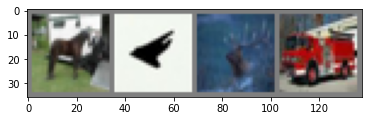

In [162]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1,2,0).numpy() / 2 + 0.5)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [163]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))

Predicted:  horse plane deer truck
